In [1]:
import gdown

url = 'https://drive.google.com/drive/folders/1Z7R1g3CJjXe8NVXN7FLzyW6Mx5Vbrp-s?usp=sharing'

gdown.download_folder(url, quiet= True, use_cookies= False, remaining_ok= True)

['/content/kanada/Dig-MNIST.csv',
 '/content/kanada/test.csv',
 '/content/kanada/train.csv']

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random

import torch
from torch import nn
from torch.nn import functional as F
import torchvision

from tqdm.auto import tqdm


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
train_data = pd.read_csv('/content/kanada/train.csv')
test_data = pd.read_csv('/content/kanada/test.csv')

In [4]:
train=train_data.drop('label',axis=1).columns


In [5]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:

pca_train=PCA(n_components=4,whiten=True)
pca_train.fit(train_data.drop('label',axis=1))

PCA(n_components=4, whiten=True)

In [7]:
transformed=pca_train.transform(train_data.drop('label',axis=1))
pd_transform=pd.DataFrame(transformed)
pd_transform


,0,1,2,3
0,1.369109,-0.722041,0.089564,-1.080298
1,0.677438,-0.264808,0.160959,-1.839662
2,-0.965913,1.754151,1.314650,-0.511166
3,-0.780289,0.273293,-1.261051,-0.028567
4,-0.217991,0.009660,-1.566370,0.420910
...,...,...,...,...
59995,-0.478651,1.043588,2.247617,0.485806
59996,-0.934635,0.123975,0.385485,-0.689420
59997,-1.290992,0.016148,1.426866,-1.177903
59998,1.751402,-0.287165,0.898910,1.543721


In [8]:
original_transform=pca_train.inverse_transform(transformed)
pd_original=pd.DataFrame(original_transform)
pd_original

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-5.981447e-14,-1.758034e-14,3.799324e-14,-1.095912e-14,-8.383861e-17,0.003757,0.013369,-0.002060,0.002116,0.027754,...,0.030028,0.027094,0.018088,0.033966,0.026793,0.001121,0.007821,0.0,-0.000360,0.0
1,-5.058044e-14,-3.560446e-14,6.540850e-14,-1.818001e-14,-1.371560e-16,0.016197,0.053104,0.029236,0.081538,0.149797,...,0.032633,0.019581,0.008037,0.018921,0.025390,-0.000102,0.008838,0.0,0.002524,0.0
2,-3.710803e-14,-5.609389e-14,2.475130e-14,-1.595196e-15,-4.218108e-17,0.037664,0.126653,0.157044,0.338787,0.513537,...,0.016094,0.023861,0.019498,0.033263,0.019740,0.001766,0.001730,0.0,0.005290,0.0
3,6.000415e-14,3.497136e-14,-4.471856e-15,-2.771357e-15,1.381554e-17,0.007837,0.014663,0.009458,0.030021,0.023595,...,0.011904,-0.005066,-0.006542,-0.011711,-0.003249,-0.000321,0.003778,0.0,0.007350,0.0
4,5.417152e-14,5.350531e-14,-2.193281e-14,9.517498e-16,4.832322e-17,-0.001858,-0.019618,-0.022937,-0.043177,-0.093172,...,0.011088,-0.001845,-0.001681,-0.004645,-0.003166,0.000301,0.003314,0.0,0.005820,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-5.373421e-14,-6.263500e-14,-6.493730e-15,9.994593e-15,1.581094e-17,0.028875,0.111398,0.164310,0.324067,0.509058,...,0.010658,0.040170,0.038438,0.062792,0.025785,0.003889,0.000023,0.0,0.000303,0.0
59996,2.080789e-14,-2.484890e-14,2.634373e-14,-5.998299e-15,-5.348695e-17,0.021601,0.076713,0.078689,0.167236,0.268548,...,0.016257,0.009065,0.003400,0.007242,0.010304,0.000199,0.004915,0.0,0.005006,0.0
59997,7.048275e-15,-6.407983e-14,4.838059e-14,-8.739950e-15,-1.011713e-16,0.032092,0.122724,0.127873,0.265585,0.442405,...,0.018241,0.014995,0.006513,0.014037,0.016983,0.000226,0.005762,0.0,0.004169,0.0
59998,-7.555320e-14,3.343919e-15,-5.087990e-14,1.711300e-14,1.000073e-16,-0.007672,-0.018247,0.025442,0.020420,0.035450,...,0.012645,0.048618,0.050208,0.080391,0.027203,0.005305,0.000449,0.0,-0.005090,0.0


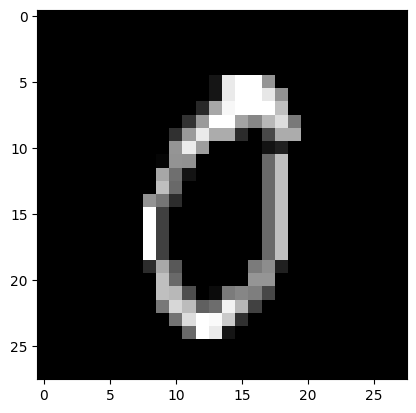

In [9]:
plt.imshow(train_data.drop('label',axis=1)[0:1].to_numpy().reshape(28,28),cmap="gray")


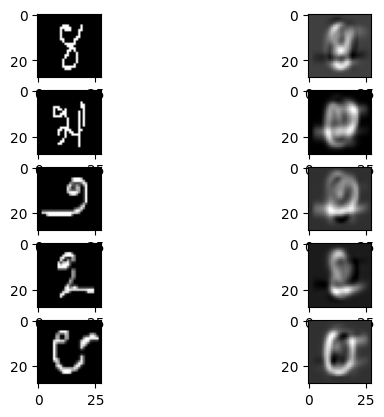

In [10]:
import random
n = 5
fig, ax = plt.subplots(n,2)
for i in range(n):
   x = random.randint(0, 783)
   ax[i, 0].imshow(train_data.drop('label',axis=1)[x : x+1].to_numpy().reshape(28, 28), cmap= 'gray')
   ax[i, 1].imshow(pd_original[x : x+1].to_numpy().reshape(28, 28), cmap= 'gray')
plt.show()

## Auto Encoders

In [11]:
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset

class KannadaDataset(Dataset):

  def __init__(self, data, transform= None, train= True):

    if train == True:
        self.data = data.drop('label', axis= 1)
        self.transform = transform
    else:
        self.data = data
        self.transform = transform


  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    image = torch.tensor(self.data.iloc[idx, :])

    if self.transform:
      image = self.transform(image)

    return image

In [12]:
train = KannadaDataset(train_data, train= True)

In [13]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train, batch_size= 64, shuffle= True)

In [14]:
class AE(nn.Module):

  def __init__(self):
    super(AE, self).__init__()
    self.fc1 = nn.Linear(784, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 4)
    self.fc4 = nn.Linear(4, 256)
    self.fc5 = nn.Linear(256, 512)
    self.fc6 = nn.Linear(512, 784)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = x.float()
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    x = self.relu(x)
    x = self.fc4(x)
    x = self.relu(x)
    x = self.fc5(x)
    x = self.relu(x)
    x = self.fc6(x)
    x = self.relu(x)



    return x

In [15]:
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

In [16]:
model = AE().to(device)

lr = 1e-3
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr= lr)

In [17]:
from sklearn.metrics import accuracy_score

def train_ae(model, dataloader, optimizer, loss_fn):
  model.train()
  train_loss = 0

  for X in dataloader:

    # Forward Pass
    X = X.to(torch.device("cuda"))
    y_pred = model(X)
    loss = loss_fn(y_pred, X.float())

    train_loss += loss

    # Back Propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss /= len(dataloader)

  print(f"Train loss: {train_loss:.4f}")

  return y_pred

In [18]:
torch.manual_seed(0)

EPOCHS = 10

for epoch in tqdm(range(EPOCHS)):

  out = train_ae(model, train_dataloader, optimizer, loss_fn)

  0%|          | 0/10 [00:00<?, ?it/s]

Train loss: 2.3205
Train loss: 2.1782
Train loss: 2.2511
Train loss: 2.2025
Train loss: 2.2020
Train loss: 2.0097
Train loss: 2.4234
Train loss: 1.8926
Train loss: 2.2383
Train loss: 1.8867


In [21]:
def com_in_out(model, dataloader):

  data = torch.empty((0, 784), dtype=torch.float32)
  output = torch.empty((0, 784), dtype=torch.float32)

  for X in dataloader:
    X = X.to(torch.device("cuda"))
    out = model(X)

    data = torch.cat((data, X.detach().cpu()), 0)
    output = torch.cat((output, out.detach().cpu()), 0)


  for i in range(10):

    fig, ax = plt.subplots(1, 2)

    x = random.randint(0, len(data))

    ax[0].imshow(data[x].detach().cpu().reshape(28,28), cmap= 'gray')

    ax[1].imshow(output[x].detach().cpu().reshape(28,28), cmap= 'gray')


  plt.show()


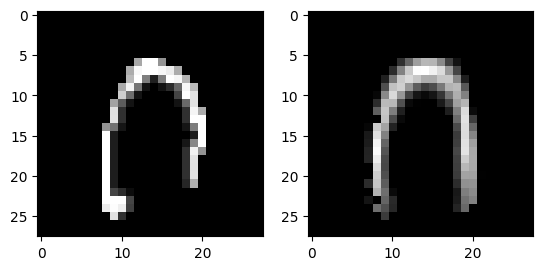

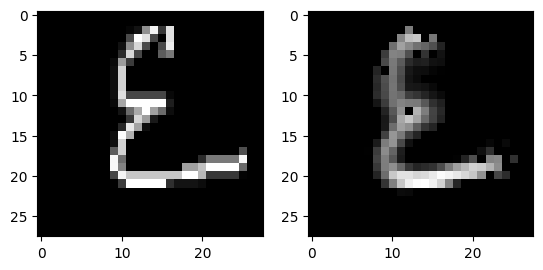

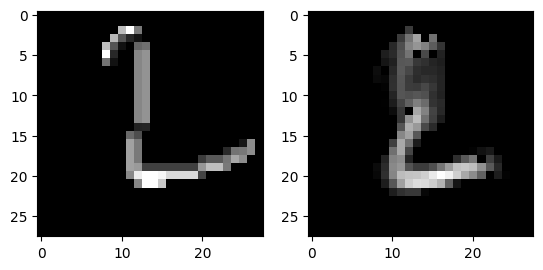

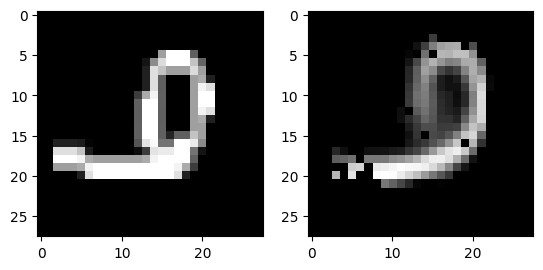

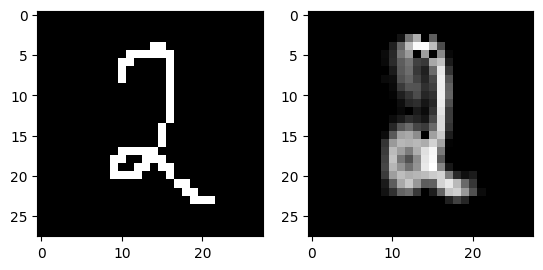

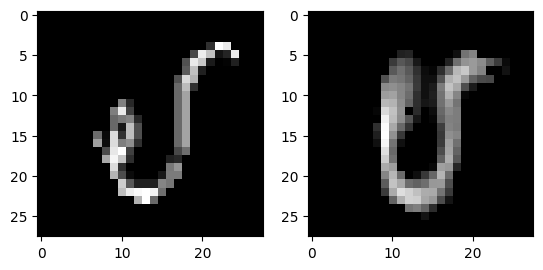

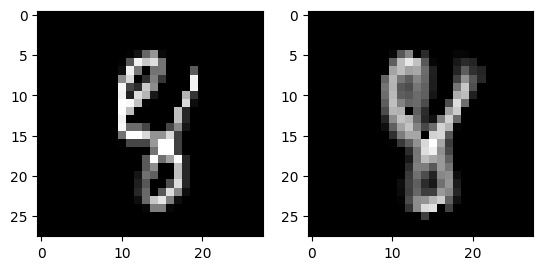

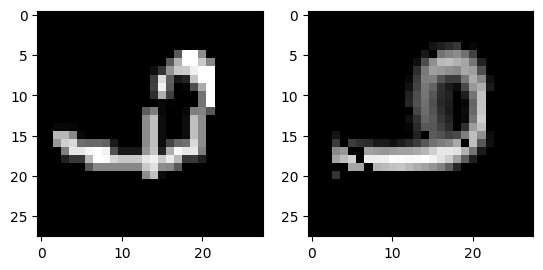

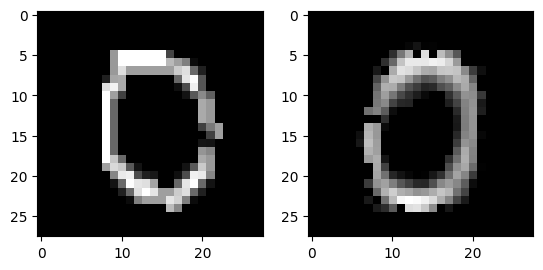

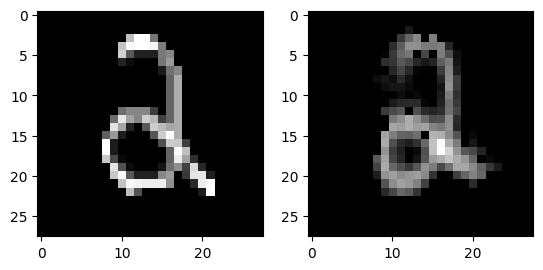

In [22]:
com_in_out(model, train_dataloader)